In [1]:
import pickle
import matplotlib.pyplot as plt
import sklearn
from matplotlib import cm
from sklearn import manifold
import seaborn as sns
import numpy as np

In [2]:
# load pickled data
avg_attns = pickle.load(open("./results/AST_attentions_avg.pkl", "rb"))

In [3]:
BLUE = "#3498db"
RED = "#e74c3c"

In [4]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer][head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs

def add_line(key, ax, color, label, linestyle,marker, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=25, label=label, color=color, marker=marker)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color, linestyle=linestyle)
  ax.legend(loc=1, fontsize=12, frameon=True, prop={'weight':'bold'})
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")

In [5]:
avg_attns.keys()

dict_keys(['return_statement_correct', 'return_statement_wrong', 'method_signature_correct', 'method_signature_wrong', 'if_else_statements_wrong', 'if_else_statements_correct', 'while_statements_correct', 'while_statements_wrong'])

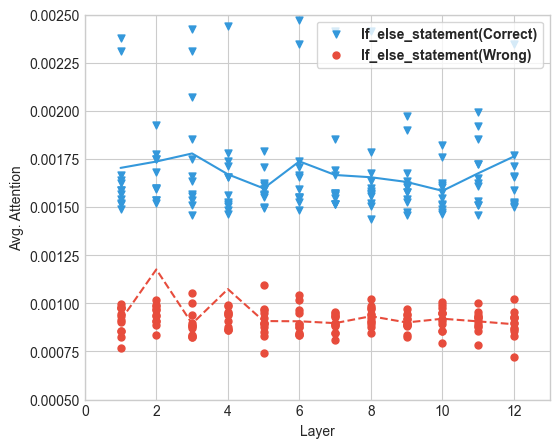

In [6]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 11))
ax = plt.subplot(2, 1, 1)
ax.set_ylim(0.0005, 0.0025)
ax.set_xlim(0, 13)

for key, color, label, style, marker in [ ("if_else_statements_correct", BLUE, "If_else_statement(Correct)", '-', 'v'), 
                                          ("if_else_statements_wrong", RED, "If_else_statement(Wrong)", '--', 'o')]:
  add_line(key, ax, color, label, style, marker)

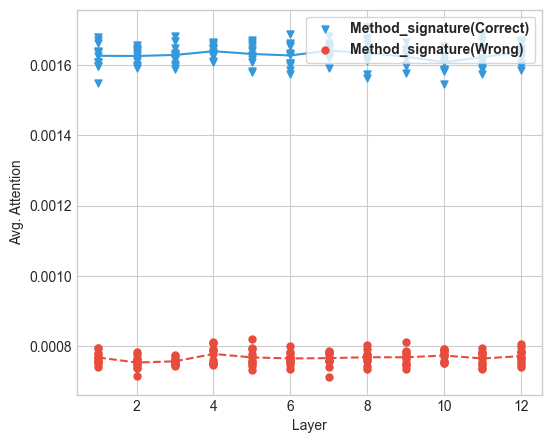

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 11))
ax = plt.subplot(2, 1, 1)
# ax.set_ylim(0.001, 0.002)
# ax.set_xlim(0, 13)
for key, color, label, style, marker  in [ ("method_signature_correct", BLUE, "Method_signature(Correct)", '-', 'v'),
                           ("method_signature_wrong", RED, "Method_signature(Wrong)", '--', 'o')
                           ]:
  add_line(key, ax, color, label, style, marker )

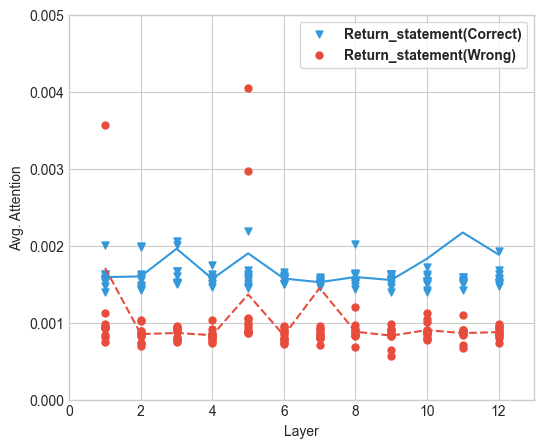

In [8]:
plt.figure(figsize=(6, 11))
ax = plt.subplot(2, 1, 1)
ax.set_ylim(0, 0.0050)
ax.set_xlim(0, 13)

for key,  color, label, style, marker in [ ("return_statement_correct", BLUE, "Return_statement(Correct)", '-', 'v'), 
                           ("return_statement_wrong", RED, "Return_statement(Wrong)", '--', 'o')]:
  add_line(key, ax, color, label, style, marker)

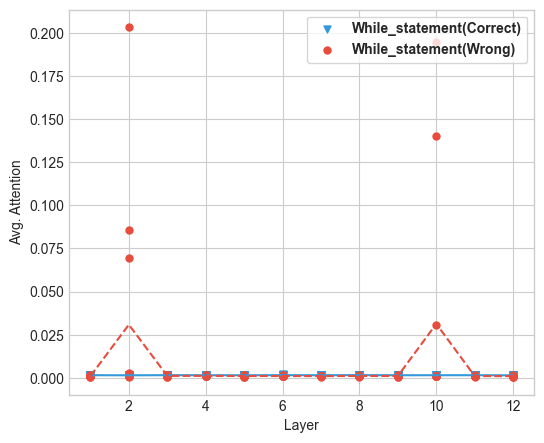

In [9]:
plt.figure(figsize=(6, 11))
ax = plt.subplot(2, 1, 1)

for key,  color, label, style, marker  in [ ("while_statements_correct", BLUE, "While_statement(Correct)", '-', 'v'),
                      ("while_statements_wrong", RED, "While_statement(Wrong)",  '--', 'o')]:
  add_line(key, ax, color, label, style, marker)